<a href="https://colab.research.google.com/github/Paridhi004/Data-Generation-using-Modelling-and-Simulation-for-Machine-Learning/blob/main/Data_Generation_using_Modelling_and_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install simpy pandas numpy scikit-learn


In [8]:
import simpy
import random
import numpy as np

In [9]:
def customer(env, server, service_rate, wait_times):
    arrival_time = env.now
    with server.request() as req:
        yield req
        wait_times.append(env.now - arrival_time)
        service_time = random.expovariate(service_rate)
        yield env.timeout(service_time)

In [10]:
def arrival_process(env, server, arrival_rate, service_rate, wait_times):
    while True:
        inter_arrival = random.expovariate(arrival_rate)
        yield env.timeout(inter_arrival)
        env.process(customer(env, server, service_rate, wait_times))

In [11]:
def run_simulation(arrival_rate, service_rate, sim_time):
    env = simpy.Environment()
    server = simpy.Resource(env, capacity=1)
    wait_times = []

    env.process(arrival_process(env, server, arrival_rate, service_rate, wait_times))
    env.run(until=sim_time)

    avg_wait = np.mean(wait_times) if wait_times else 0
    utilization = arrival_rate / service_rate
    avg_queue_len = arrival_rate * avg_wait

    return avg_wait, utilization, avg_queue_len

In [13]:
import pandas as pd

data = []

for _ in range(1000):
    arrival_rate = random.uniform(0.5, 5)
    service_rate = random.uniform(1, 6)
    sim_time = random.randint(50, 200)

    avg_wait, utilization, avg_queue = run_simulation(
        arrival_rate, service_rate, sim_time
    )

    data.append([
        arrival_rate,
        service_rate,
        sim_time,
        avg_wait,
        utilization,
        avg_queue
    ])

df = pd.DataFrame(data, columns=[
    "ArrivalRate",
    "ServiceRate",
    "SimulationTime",
    "AverageWaitingTime",
    "ServerUtilization",
    "AverageQueueLength"
])

df.to_csv("synthetic_data.csv", index=False)

## Load Data and Prepare Features



In [14]:
df = pd.read_csv('synthetic_data.csv')
X = df[['ArrivalRate', 'ServiceRate', 'SimulationTime']]
y = df['AverageWaitingTime']

print("DataFrame loaded successfully. First 5 rows of X:")
print(X.head())
print("\nFirst 5 values of y:")
print(y.head())

DataFrame loaded successfully. First 5 rows of X:
   ArrivalRate  ServiceRate  SimulationTime
0     3.479535     4.808373             161
1     2.388667     3.536252             150
2     1.861790     5.282099              77
3     1.826272     1.073053             198
4     2.685534     2.840784             128

First 5 values of y:
0     0.385301
1     0.673323
2     0.082245
3    28.152593
4     8.870284
Name: AverageWaitingTime, dtype: float64


## Split Data


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data split into training and testing sets.
X_train shape: (800, 3)
X_test shape: (200, 3)
y_train shape: (800,)
y_test shape: (200,)


## Train and Evaluate Models



In [19]:
import sys
!{sys.executable} -m pip install xgboost lightgbm

In [20]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

results = []

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "K-Neighbors": KNeighborsRegressor(),
    "Support Vector Regressor": SVR(),
    "Ridge": Ridge(random_state=42),
    "Lasso": Lasso(random_state=42),
    "ElasticNet": ElasticNet(random_state=42),
    "MLPRegressor": MLPRegressor(random_state=42, max_iter=1000),
    "XGBoost": XGBRegressor(random_state=42),
    "LightGBM": LGBMRegressor(random_state=42)
}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "MAE": mae,
        "MSE": mse,
        "R2": r2
    })
    print(f"{name} - MAE: {mae:.4f}, MSE: {mse:.4f}, R2: {r2:.4f}\n")

print("Model training and evaluation complete.")

Training Linear Regression...
Linear Regression - MAE: 6.9587, MSE: 80.2698, R2: 0.5983

Training Decision Tree...
Decision Tree - MAE: 2.7958, MSE: 28.8368, R2: 0.8557

Training Random Forest...
Random Forest - MAE: 1.7560, MSE: 12.8562, R2: 0.9357

Training Gradient Boosting...
Gradient Boosting - MAE: 2.0570, MSE: 13.6537, R2: 0.9317

Training K-Neighbors...
K-Neighbors - MAE: 4.6490, MSE: 68.8727, R2: 0.6553

Training Support Vector Regressor...
Support Vector Regressor - MAE: 7.7507, MSE: 250.8159, R2: -0.2553

Training Ridge...
Ridge - MAE: 6.9578, MSE: 80.2728, R2: 0.5982

Training Lasso...
Lasso - MAE: 6.8529, MSE: 81.9378, R2: 0.5899

Training ElasticNet...
ElasticNet - MAE: 6.7328, MSE: 87.6382, R2: 0.5614

Training MLPRegressor...
MLPRegressor - MAE: 1.9270, MSE: 10.9917, R2: 0.9450

Training XGBoost...
XGBoost - MAE: 1.9320, MSE: 15.7427, R2: 0.9212

Training LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000140 seconds.


In [21]:
import pandas as pd

results_df = pd.DataFrame(results)
print("Model Evaluation Results:")
print(results_df.to_markdown(index=False))

Model Evaluation Results:
| Model                    |     MAE |      MSE |        R2 |
|:-------------------------|--------:|---------:|----------:|
| Linear Regression        | 6.95873 |  80.2698 |  0.59826  |
| Decision Tree            | 2.79585 |  28.8368 |  0.855676 |
| Random Forest            | 1.75602 |  12.8562 |  0.935657 |
| Gradient Boosting        | 2.05704 |  13.6537 |  0.931665 |
| K-Neighbors              | 4.64899 |  68.8727 |  0.655301 |
| Support Vector Regressor | 7.75074 | 250.816  | -0.255301 |
| Ridge                    | 6.95778 |  80.2728 |  0.598245 |
| Lasso                    | 6.85293 |  81.9378 |  0.589912 |
| ElasticNet               | 6.7328  |  87.6382 |  0.561382 |
| MLPRegressor             | 1.92695 |  10.9917 |  0.944988 |
| XGBoost                  | 1.93198 |  15.7427 |  0.92121  |
| LightGBM                 | 1.89735 |  12.4376 |  0.937752 |


In [22]:
best_r2_model = results_df.loc[results_df['R2'].idxmax()]
best_mae_model = results_df.loc[results_df['MAE'].idxmin()]

print("\n--- Best Model Identification ---")
print("\nModel with the Highest R-squared (best fit to data):")
print(best_r2_model)

print("\nModel with the Lowest MAE (least average absolute errors):")
print(best_mae_model)

print("\n--- Full Model Evaluation Results ---")
print(results_df.to_markdown(index=False))


--- Best Model Identification ---

Model with the Highest R-squared (best fit to data):
Model    MLPRegressor
MAE          1.926954
MSE         10.991729
R2           0.944988
Name: 9, dtype: object

Model with the Lowest MAE (least average absolute errors):
Model    Random Forest
MAE           1.756017
MSE          12.856175
R2            0.935657
Name: 2, dtype: object

--- Full Model Evaluation Results ---
| Model                    |     MAE |      MSE |        R2 |
|:-------------------------|--------:|---------:|----------:|
| Linear Regression        | 6.95873 |  80.2698 |  0.59826  |
| Decision Tree            | 2.79585 |  28.8368 |  0.855676 |
| Random Forest            | 1.75602 |  12.8562 |  0.935657 |
| Gradient Boosting        | 2.05704 |  13.6537 |  0.931665 |
| K-Neighbors              | 4.64899 |  68.8727 |  0.655301 |
| Support Vector Regressor | 7.75074 | 250.816  | -0.255301 |
| Ridge                    | 6.95778 |  80.2728 |  0.598245 |
| Lasso                    |



### Visualization of Model Performance


/tmp/ipython-input-1175396749.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R2', data=results_df_sorted, palette='viridis')


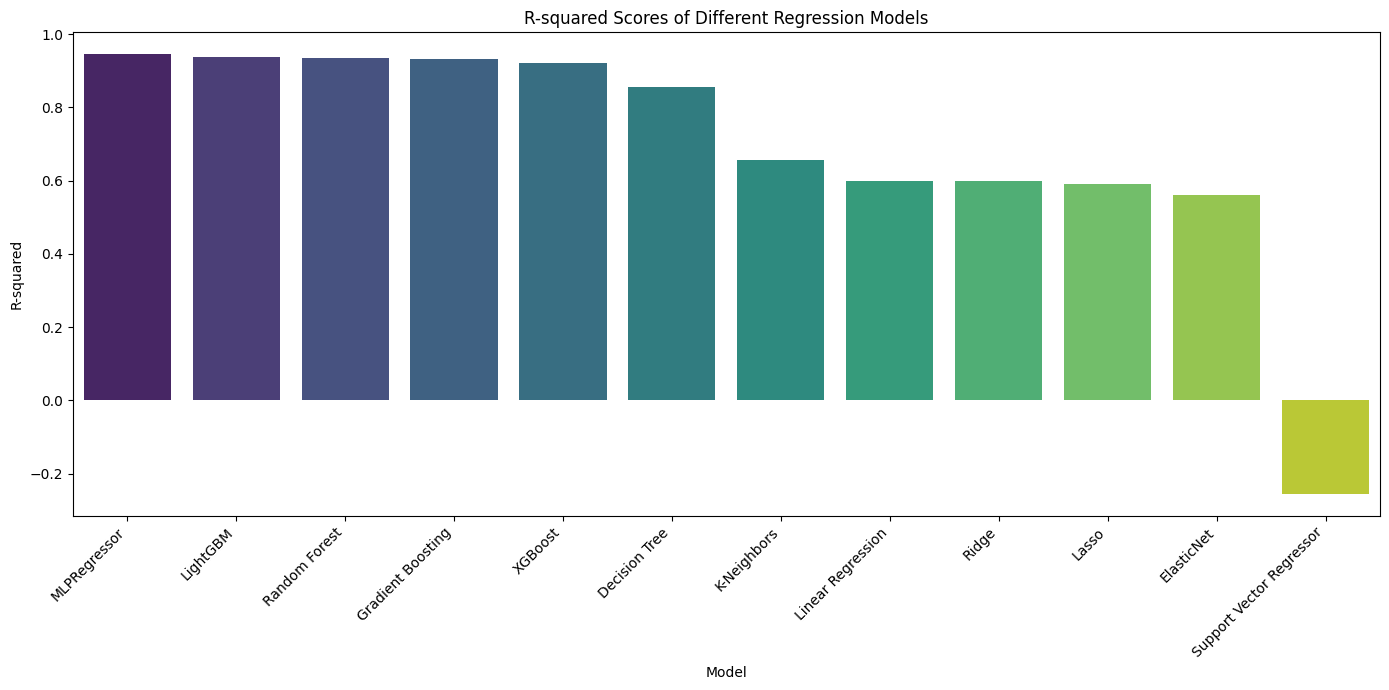

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

results_df_sorted = results_df.sort_values(by='R2', ascending=False)

plt.figure(figsize=(14, 7))
sns.barplot(x='Model', y='R2', data=results_df_sorted, palette='viridis')
plt.xlabel('Model')
plt.ylabel('R-squared')
plt.title('R-squared Scores of Different Regression Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()





/tmp/ipython-input-2950798991.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MAE', data=results_df_sorted.sort_values(by='MAE'), palette='plasma')


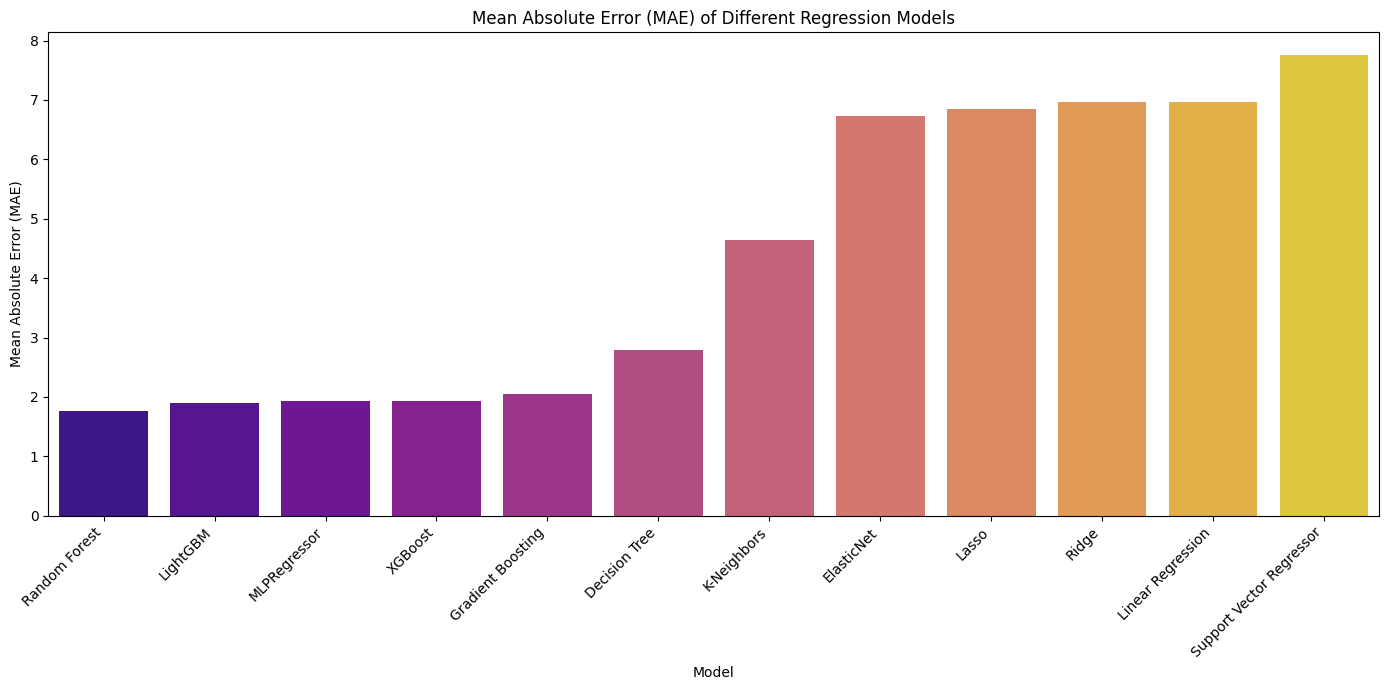

In [27]:
plt.figure(figsize=(14, 7))
sns.barplot(x='Model', y='MAE', data=results_df_sorted.sort_values(by='MAE'), palette='plasma')
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Mean Absolute Error (MAE) of Different Regression Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-1862136450.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MSE', data=results_df_sorted.sort_values(by='MSE'), palette='magma')


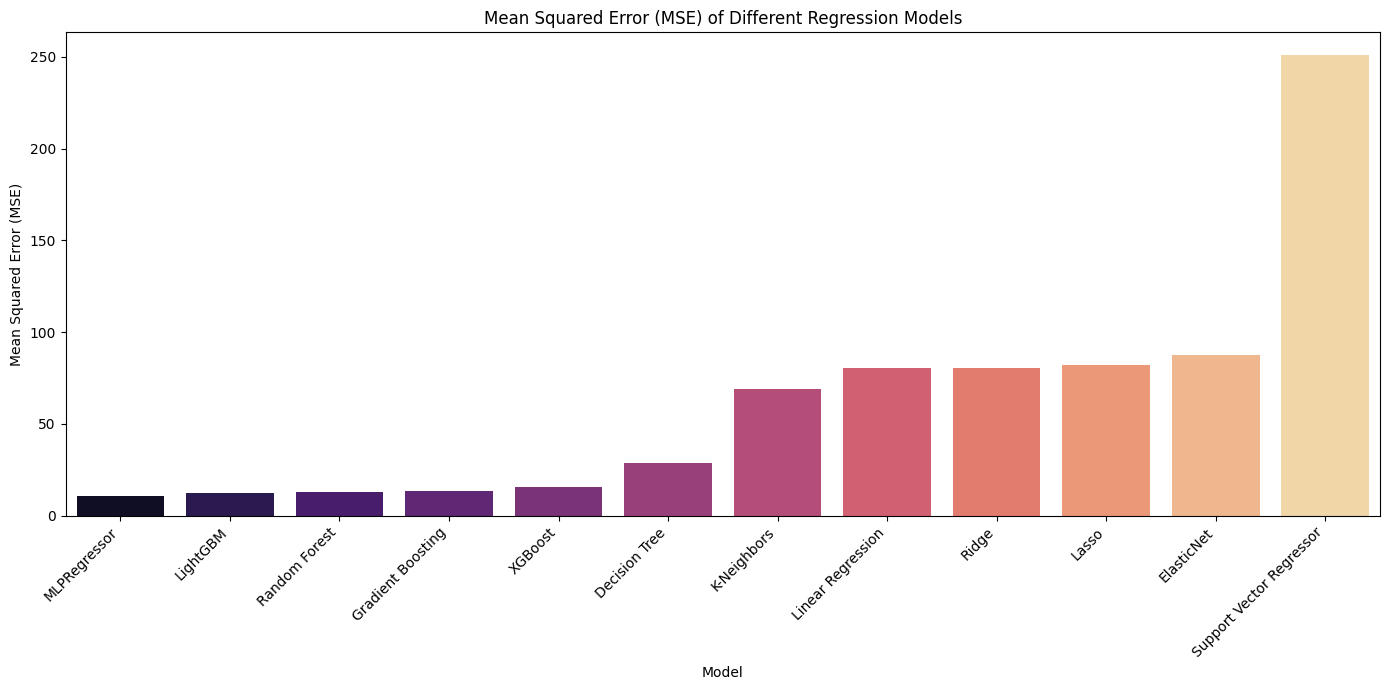

In [28]:
plt.figure(figsize=(14, 7))
sns.barplot(x='Model', y='MSE', data=results_df_sorted.sort_values(by='MSE'), palette='magma')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error (MSE) of Different Regression Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()